## Compare IC/ICIR of time-series betas and firm characteristics

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from tqdm import tqdm
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats.mstats import spearmanr
from scipy.stats.mstats import winsorize
import seaborn as sn

In [2]:
def replacer(l,target_val=0,replace_val=np.NaN,repeat_max=10):
    #repeat_max = n (consecutive 0s over 10 times will be replaced with NAs)
    counter = 0
    new_l = []
    for e in l:
        if e == target_val: counter += 1
        else:
            counter = 0

        if counter > repeat_max:
            new_l.append(replace_val)
        else:
            new_l.append(e)

    return new_l

Import Data

In [3]:
# Import excessive market return (J203T - Rf)
df_MR = pd.read_csv('df_MR.csv')
df_MR.Dates = df_MR.Dates.apply(lambda x:x[:10])
df_MR.set_index('Dates',inplace=True)

Import risk-free rate (91-day T-Bill)

In [4]:
df_RF = pd.read_csv('df_RF.csv',index_col=0)

Import listed stock returns on the JSE

In [5]:
df_SR = pd.read_csv('df_SR.csv',index_col=0)
df_SR.index = df_SR.index.to_series().apply(lambda x:x[:10])
df_SR.index = pd.to_datetime(df_SR.index)

Drop the columns of stock returns that full of 0s or NAs and replace consecutive 0s with NAs

In [6]:
df_SR = df_SR.loc[:, (df_SR != 0).any(axis=0)].astype(np.float64)
df_SR = df_SR.dropna(axis = 0, how = 'all')
df_SR = df_SR.apply(replacer)

Calculate the Excess Stock Returns 

In [7]:
df_Ex_SR = df_SR-df_RF.values

Import the Factor Realizations (Mimicking portfolio returns)

In [8]:
df_FF3 = pd.read_csv('df_FF3.csv')
df_FF3.Dates = df_FF3.Dates.apply(lambda x: x[:10])
df_FF3.set_index('Dates',inplace=True)
df_FF3.index = pd.to_datetime(df_FF3.index)

In [9]:
df_FF4 = pd.read_csv('df_FF4.csv')
df_FF4.Dates = df_FF4.Dates.apply(lambda x:x[:10])
df_FF4.set_index('Dates',inplace=True)
df_FF4.index = pd.to_datetime(df_FF4.index)

In [10]:
df_FF4_tmp = pd.read_csv('df_FF4_tmp.csv')
df_FF4_tmp.Dates = df_FF4_tmp.Dates.apply(lambda x:x[:10])
df_FF4_tmp.set_index('Dates',inplace=True)
df_FF4_tmp.index = pd.to_datetime(df_FF4_tmp.index)
df_FF4_tmp = df_FF4_tmp.apply(lambda x: winsorize(x, (0.01, 0.01)))
df_FF4["WML"] = df_FF4_tmp["WML"].values

In [11]:
df_FF5 = pd.read_csv('df_FF5.csv')
df_FF5.Dates = df_FF5.Dates.apply(lambda x:x[:10])
df_FF5.set_index('Dates',inplace=True)
df_FF5.index = pd.to_datetime(df_FF5.index)

Import Firm Characteristics 

In [12]:
df_ln_Size = pd.read_csv('df_ln_Size.csv')
df_ln_Size = df_ln_Size.replace([np.inf, -np.inf], np.nan)
df_ln_Size.Dates = df_ln_Size.Dates.apply(lambda x:x[:10])
df_ln_Size.set_index('Dates',inplace=True)
df_ln_Size.index = pd.to_datetime(df_ln_Size.index)

In [13]:
df_PB = pd.read_csv('df_std_PB.csv')
df_PB = df_PB.replace([np.inf, -np.inf], np.nan)
df_PB.Dates = df_PB.Dates.apply(lambda x:x[:10])
df_PB.set_index('Dates',inplace=True)
df_PB.index = pd.to_datetime(df_PB.index)
df_BM = 1/df_PB

In [14]:
df_PE = pd.read_csv('df_std_PE.csv')
df_PE = df_PE.replace([np.inf, -np.inf], np.nan)
df_PE.Dates = df_PE.Dates.apply(lambda x:x[:10])
df_PE.set_index('Dates',inplace=True)
df_PE.index = pd.to_datetime(df_PE.index)
df_EP = 1/df_PE

In [15]:
df_OP = pd.read_csv('df_std_OP.csv')
df_OP = df_OP.replace([np.inf, -np.inf], np.nan)
df_OP.Dates = df_OP.Dates.apply(lambda x:x[:10])
df_OP.set_index('Dates',inplace=True)
df_OP.index = pd.to_datetime(df_OP.index)

In [16]:
df_INV = pd.read_csv('df_std_INV.csv')
df_INV = df_INV.replace([np.inf, -np.inf], np.nan)
df_INV.Dates = df_INV.Dates.apply(lambda x:x[:10])
df_INV.set_index('Dates',inplace=True)
df_INV.index = pd.to_datetime(df_INV.index)

Momentum

In [17]:
gap = 21
win = 250

In [71]:
pd.DataFrame(np.nansum(df_Ex_SR_trnct.iloc[i:(win-gap)+i,:], axis=0))

,0
0,-0.217857
1,-0.681597
2,-0.175284
3,-0.362591
4,-0.187300
...,...
240,0.000000
241,0.000000
242,0.000000
243,0.000000


In [87]:
df_Ex_SR_trnct = df_SR
all_mom = pd.DataFrame()
for i in tqdm(range(len(df_Ex_SR_trnct)-win)):
    all_mom = pd.concat([all_mom,pd.DataFrame(np.nansum(df_Ex_SR_trnct.iloc[i:(win-gap)+i,:], axis=0)).T], axis=0) # daily basis
all_mom

100%|██████████| 4965/4965 [00:03<00:00, 1398.11it/s]


,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,-0.512503,-1.392339,-0.106556,-1.167605,-0.126944,-1.220780,0.024098,-1.635549,-0.283561,0.043485,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,-0.497206,-1.300852,-0.168406,-1.178655,-0.097856,-1.252452,0.072321,-1.649091,-0.242828,0.058404,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,-0.471474,-1.222841,-0.261774,-1.129865,-0.099374,-1.285625,0.195745,-1.742969,-0.232033,0.041304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,-0.531905,-1.240289,-0.333567,-1.167605,-0.091936,-1.309780,0.159849,-1.802122,-0.270284,0.017192,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,-0.562134,-1.344014,-0.322288,-1.098612,-0.133548,-1.290984,0.115069,-1.983298,-0.335981,0.014982,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000000,0.000000,0.078886,0.000000,-0.913429,0.000000,-0.263365,0.000000,0.064987,-0.424555,...,-2.056452,0.023542,-0.111918,0.164780,0.258379,-0.241213,0.070381,0.586231,0.172271,0.112243
0,0.000000,0.000000,0.047343,0.000000,-0.913429,0.000000,-0.293019,0.000000,0.015270,-0.459364,...,-2.028945,0.030941,-0.149414,0.128697,0.233572,-0.243099,0.068300,0.570785,0.150190,0.130323
0,0.000000,0.000000,0.075946,0.000000,-0.913429,0.000000,-0.296405,0.000000,-0.040822,-0.460922,...,-2.024953,0.027481,-0.146727,0.146209,0.181564,-0.280615,0.070381,0.570395,0.141429,0.144862
0,0.000000,0.000000,0.059148,0.000000,-0.913429,0.000000,-0.311753,0.000000,-0.084677,-0.496898,...,-1.883875,0.013020,-0.085360,0.134816,0.156220,-0.301668,0.107546,0.543126,0.129117,0.149319


In [83]:
df_Ex_SR_trnct = df_Ex_SR.loc[df_FF4.index,:].dropna(axis = 1)

df_mom = pd.DataFrame()
for i in tqdm(range(len(df_Ex_SR_trnct)-win)):
    df_mom = pd.concat([df_mom, pd.DataFrame(df_Ex_SR_trnct.iloc[i:(win-gap)+i,:].sum()).T], axis=0) # daily basis
df_mom

100%|██████████| 4500/4500 [00:02<00:00, 2041.05it/s]


,MTN.SJ.Equity,AEG.SJ.Equity,NTC.SJ.Equity,WHL.SJ.Equity,SOL.SJ.Equity,RMH.SJ.Equity,SAP.SJ.Equity,IMP.SJ.Equity,NPK.SJ.Equity,GFI.SJ.Equity,...,ART.SJ.Equity,TRE.SJ.Equity,JSC.SJ.Equity,FBR.SJ.Equity,AEL.SJ.Equity,SNT.SJ.Equity,CLH.SJ.Equity,HDC.SJ.Equity,BEL.SJ.Equity,CSB.SJ.Equity
0,-0.301393,0.119817,0.760109,0.226376,0.542933,-0.090897,0.554993,-0.007174,0.066430,0.468221,...,0.331455,0.743799,-0.351464,-0.336100,0.148903,0.153481,0.476062,1.080867,0.025821,1.783368
0,-0.287429,0.127401,0.737955,0.235231,0.534875,-0.116588,0.522316,-0.029095,0.048796,0.453693,...,0.406996,0.737583,-0.351431,-0.429309,0.156706,0.143726,0.498587,1.073783,-0.030924,1.796140
0,-0.297527,0.133706,0.754114,0.240632,0.548553,-0.107525,0.507489,-0.010214,0.102564,0.362834,...,0.388680,0.737617,-0.433768,-0.423045,0.176896,0.144703,0.523345,1.092082,0.004956,1.806124
0,-0.339658,0.142148,0.762697,0.222970,0.552188,-0.154248,0.457858,-0.038430,0.090854,0.381531,...,0.388715,0.731363,-0.463840,-0.380450,0.173221,0.147047,0.508320,1.092117,-0.023788,1.806159
0,-0.315375,0.132240,0.754189,0.223010,0.565315,-0.167598,0.454454,-0.049722,0.099297,0.358420,...,0.388755,0.731403,-0.492788,-0.380410,0.173260,0.152626,0.508359,1.092156,-0.010143,1.793460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.181847,3.413287,-0.029621,-0.219405,-0.033841,-0.061497,-0.042443,0.145331,-0.128965,0.194849,...,-0.022685,-0.317602,4.740791,-0.265123,0.255144,-0.098581,-0.290838,-0.127177,-0.401232,-0.456272
0,-0.141298,3.396085,0.014698,-0.167612,-0.011512,-0.036328,-0.001356,0.180422,-0.118027,0.253251,...,-0.035671,-0.303014,4.740783,-0.239946,0.279289,-0.110923,-0.301721,-0.138317,-0.394789,-0.499905
0,-0.125965,3.503354,-0.001299,-0.198936,-0.009626,-0.043169,-0.004058,0.217633,-0.116628,0.273706,...,0.034664,-0.307934,4.740775,-0.264886,0.264974,-0.110418,-0.288057,-0.148530,-0.432185,-0.521928
0,-0.086165,3.623531,-0.009841,-0.181625,-0.049360,-0.010393,-0.011710,0.280051,-0.126009,0.261637,...,-0.010558,-0.319359,4.740768,-0.268557,0.255557,-0.090986,-0.300995,-0.148255,-0.362195,-0.576412


In [84]:
index = df_Ex_SR_trnct.iloc[win:,:].index
df_mom.index = index
df_mom.columns = df_Ex_SR_trnct.columns
df_mom

,MTN.SJ.Equity,AEG.SJ.Equity,NTC.SJ.Equity,WHL.SJ.Equity,SOL.SJ.Equity,RMH.SJ.Equity,SAP.SJ.Equity,IMP.SJ.Equity,NPK.SJ.Equity,GFI.SJ.Equity,...,ART.SJ.Equity,TRE.SJ.Equity,JSC.SJ.Equity,FBR.SJ.Equity,AEL.SJ.Equity,SNT.SJ.Equity,CLH.SJ.Equity,HDC.SJ.Equity,BEL.SJ.Equity,CSB.SJ.Equity
Dates,,,,,,,,,,,,,,,,,,,,,
2001-12-05,-0.301393,0.119817,0.760109,0.226376,0.542933,-0.090897,0.554993,-0.007174,0.066430,0.468221,...,0.331455,0.743799,-0.351464,-0.336100,0.148903,0.153481,0.476062,1.080867,0.025821,1.783368
2001-12-06,-0.287429,0.127401,0.737955,0.235231,0.534875,-0.116588,0.522316,-0.029095,0.048796,0.453693,...,0.406996,0.737583,-0.351431,-0.429309,0.156706,0.143726,0.498587,1.073783,-0.030924,1.796140
2001-12-07,-0.297527,0.133706,0.754114,0.240632,0.548553,-0.107525,0.507489,-0.010214,0.102564,0.362834,...,0.388680,0.737617,-0.433768,-0.423045,0.176896,0.144703,0.523345,1.092082,0.004956,1.806124
2001-12-10,-0.339658,0.142148,0.762697,0.222970,0.552188,-0.154248,0.457858,-0.038430,0.090854,0.381531,...,0.388715,0.731363,-0.463840,-0.380450,0.173221,0.147047,0.508320,1.092117,-0.023788,1.806159
2001-12-11,-0.315375,0.132240,0.754189,0.223010,0.565315,-0.167598,0.454454,-0.049722,0.099297,0.358420,...,0.388755,0.731403,-0.492788,-0.380410,0.173260,0.152626,0.508359,1.092156,-0.010143,1.793460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27,-0.181847,3.413287,-0.029621,-0.219405,-0.033841,-0.061497,-0.042443,0.145331,-0.128965,0.194849,...,-0.022685,-0.317602,4.740791,-0.265123,0.255144,-0.098581,-0.290838,-0.127177,-0.401232,-0.456272
2019-02-28,-0.141298,3.396085,0.014698,-0.167612,-0.011512,-0.036328,-0.001356,0.180422,-0.118027,0.253251,...,-0.035671,-0.303014,4.740783,-0.239946,0.279289,-0.110923,-0.301721,-0.138317,-0.394789,-0.499905
2019-03-01,-0.125965,3.503354,-0.001299,-0.198936,-0.009626,-0.043169,-0.004058,0.217633,-0.116628,0.273706,...,0.034664,-0.307934,4.740775,-0.264886,0.264974,-0.110418,-0.288057,-0.148530,-0.432185,-0.521928


# Winsorization

In [20]:
df_Ex_SR = df_Ex_SR.apply(lambda x: winsorize(x, (0.01, 0.01)))

In [21]:
df_FF3 = df_FF3.apply(lambda x: winsorize(x, (0.01, 0.01)))
df_FF4 = df_FF4.apply(lambda x: winsorize(x, (0.01, 0.01)))
df_FF5 = df_FF5.apply(lambda x: winsorize(x, (0.01, 0.01)))
df_MR = df_MR.apply(lambda x: winsorize(x, (0.01, 0.01)))

In [22]:
len(df_ln_Size)==len(df_PE)==len(df_Ex_SR)==len(df_OP)==len(df_INV)

True

In [23]:
## Firm characteristics are lagged for 1 month, to show its predicting ability towards stock returns 
Gap = 21

n = 3
holding = 21
rollingW = holding * n *12
lens = len(df_mom)
periods = int((lens - rollingW) / holding) - 1
print(rollingW, periods)

756 177


In [24]:
df_Ex_SR_trnct =df_Ex_SR.loc[df_mom.index,df_mom.columns].dropna(axis=1)
df_FF6 = pd.concat([df_FF5, df_FF4["WML"]], axis=1)

all_betas = []

for i in tqdm(range(periods)):

    df_FF6_tmp = df_FF6.iloc[i*holding:i*holding+rollingW,:]
    
    df_Ex_SR_trnct_tmp = df_Ex_SR_trnct.iloc[i*holding:i*holding+rollingW,:]
    
    betas = []
    for j in df_Ex_SR_trnct.columns:
        ols = sm.OLS(df_Ex_SR_trnct_tmp.loc[:,j].values, df_FF6_tmp.values)
        res = ols.fit()
        b = list(res.params)
        b.append(j)
        betas.append(b)
    df_betas = pd.DataFrame(betas).rename(columns={0:'MKT',1:'SMB',2:'HML',3:'RMW',4:'CMA',5:"WML",6:'stock'}).set_index('stock')
    
    all_betas.append(df_betas)


100%|██████████| 177/177 [00:05<00:00, 29.56it/s]


In [25]:
all_betas[0]

,MKT,SMB,HML,RMW,CMA,WML
stock,,,,,,
MTN.SJ.Equity,0.151649,0.333057,0.065985,0.070969,-0.032278,-0.097602
NTC.SJ.Equity,0.023740,-0.206731,-0.079620,-0.153088,-0.040675,-0.046712
WHL.SJ.Equity,0.047249,0.140719,0.034660,0.007051,-0.104684,-0.081091
SOL.SJ.Equity,0.029952,0.143373,0.100312,-0.038441,-0.064505,0.038313
RMH.SJ.Equity,0.026914,0.106434,0.068889,-0.170704,-0.038586,-0.106490
SAP.SJ.Equity,-0.014506,-0.109463,-0.023348,-0.059194,-0.110190,0.059646
IMP.SJ.Equity,0.119180,0.070740,-0.095274,0.022423,0.202766,0.067203
NPK.SJ.Equity,0.032677,-0.043649,0.043653,0.073567,-0.004879,-0.100930
GFI.SJ.Equity,-0.147473,-0.226937,0.039469,0.032928,0.112840,0.159975


In [26]:
# Keep the size and EP have the same length as stock returns
df_ln_Size_trnct = df_ln_Size.loc[df_Ex_SR_trnct.index,:]
df_BM_trnct = df_BM.loc[df_Ex_SR_trnct.index,:]
df_PE_trnct = df_PE.loc[df_Ex_SR_trnct.index,:]
df_OP_trnct = df_OP.loc[df_Ex_SR_trnct.index,:]
df_INV_trnct = df_INV.loc[df_Ex_SR_trnct.index,:]
df_MOM_trnct = df_mom.loc[df_Ex_SR_trnct.index,:]

In [27]:
IC_Series = pd.DataFrame()
k_index = []

df_Ex_SR_tmp_T = df_Ex_SR_trnct.iloc[rollingW:rollingW+periods*holding,:].T
df_ln_Size_tmp_T = df_ln_Size_trnct.iloc[rollingW:rollingW+periods*holding,:].T
df_BM_tmp_T = df_BM_trnct.iloc[rollingW:rollingW+periods*holding,:].T
df_PE_tmp_T = df_PE_trnct.iloc[rollingW:rollingW+periods*holding,:].T
df_OP_tmp_T = df_OP_trnct.iloc[rollingW:rollingW+periods*holding,:].T
df_INV_tmp_T = df_INV_trnct.iloc[rollingW:rollingW+periods*holding,:].T
df_MOM_tmp_T = df_MOM_trnct.iloc[rollingW:rollingW+periods*holding,:].T

index_times = list(df_Ex_SR_tmp_T.columns)
 
for k in tqdm(df_Ex_SR_tmp_T.columns[:-Gap]):
    IC = []

    i = int(index_times.index(k) / holding)

    index_tmp = (all_betas[i].index).intersection(df_ln_Size_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_BM_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_PE_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_Ex_SR_tmp_T.loc[:,index_times[index_times.index(k)+Gap]].dropna().index).\
                    intersection(df_OP_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_INV_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_MOM_tmp_T.loc[:,k].dropna().index)

    df_TS_CS = pd.concat([all_betas[i].loc[index_tmp,:].astype(np.float64), \
                                         df_ln_Size_tmp_T.loc[index_tmp,k],df_BM_tmp_T.loc[index_tmp,k],\
                                         df_PE_tmp_T.loc[index_tmp,k], df_OP_tmp_T.loc[index_tmp,k],\
                                         df_INV_tmp_T.loc[index_tmp,k], df_MOM_tmp_T.loc[index_tmp,k]],axis = 1)

    if len(index_tmp) > 10:
        for j in range(len(df_TS_CS.columns)):
            ic = list(spearmanr(df_TS_CS.iloc[:,j].values,df_Ex_SR_tmp_T.loc[index_tmp,index_times[index_times.index(k)+Gap]]))[0]
            IC.append(ic)
        k_index.append(k)
    IC_Series = pd.concat([IC_Series, pd.DataFrame(IC)],axis=1)
    

100%|██████████| 3696/3696 [01:06<00:00, 55.27it/s]


In [28]:
spearmanr(df_TS_CS.iloc[:,j].values,df_Ex_SR_tmp_T.loc[index_tmp,index_times[index_times.index(k)+Gap]])

SpearmanrResult(correlation=-0.09456283931610081, pvalue=0.5513890255677264)

In [29]:
df_TS_CS

,MKT,SMB,HML,RMW,CMA,WML,2018-12-27 00:00:00,2018-12-27 00:00:00,2018-12-27 00:00:00,2018-12-27 00:00:00,2018-12-27 00:00:00,2018-12-27 00:00:00
MTN.SJ.Equity,0.002018,-0.112764,-0.006761,0.047857,0.158511,-0.306379,2.051365,-268.603929,0.332473,0.084958,-0.106354,-0.474174
NTC.SJ.Equity,-0.005431,-0.025221,-0.063513,0.126490,0.051480,-0.312896,1.163263,1.163685,0.319603,0.310351,-0.093494,0.040892
WHL.SJ.Equity,-0.065147,-0.208915,-0.017117,-0.123582,-0.036029,-0.114798,1.386310,1.116412,-0.155420,0.225782,-0.001061,-0.166974
SOL.SJ.Equity,0.055183,-0.052933,0.048239,-0.061807,0.083484,-0.121443,2.291815,-3.374071,-0.162018,-0.098569,0.018957,-0.117690
RMH.SJ.Equity,0.018323,-0.253793,-0.159147,0.079283,0.076022,-0.138173,1.752945,3.863334,-0.357242,-0.157777,0.056961,0.039431
SAP.SJ.Equity,0.084411,0.080603,-0.045152,-0.086407,0.024784,-0.005225,0.020439,-6.715979,-0.242237,-0.020210,-0.080147,-0.166990
IMP.SJ.Equity,-0.156669,-0.743044,-0.098853,-0.467444,-0.180763,-0.299510,0.752702,-1.918847,10.575073,-1.179861,-0.363132,-0.073607
NPK.SJ.Equity,-0.079218,-0.192735,0.041678,0.139838,0.196321,-0.208381,0.559107,-2.177110,-0.248865,-0.038148,0.079919,-0.177660
GFI.SJ.Equity,0.142181,0.098466,-0.260896,-0.158013,0.015628,-0.308650,-0.050014,-2.694144,-0.185219,0.133314,-0.365497,-0.294274
ACL.SJ.Equity,0.148999,0.115724,0.385270,-0.077753,0.383411,0.152905,-0.168292,-1.681858,1.148390,0.066467,-0.200591,-0.055835


In [30]:
all_corr = []

index_times = list(df_Ex_SR_tmp_T.columns)
 
for k in tqdm(df_Ex_SR_tmp_T.columns[:-Gap]):
    IC = []

    i = int(index_times.index(k) / holding)

    index_tmp = (all_betas[i].index).intersection(df_ln_Size_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_BM_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_Ex_SR_tmp_T.loc[:,index_times[index_times.index(k)+Gap]].dropna().index).\
                    intersection(df_OP_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_INV_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_MOM_tmp_T.loc[:,k].dropna().index)
    if len(index_tmp) > 10:
        df_TS_CS = pd.concat([all_betas[i].loc[index_tmp,:].astype(np.float64), \
                                             df_ln_Size_tmp_T.loc[index_tmp,k],df_BM_tmp_T.loc[index_tmp,k],\
                                             df_OP_tmp_T.loc[index_tmp,k],\
                                             df_INV_tmp_T.loc[index_tmp,k], df_MOM_tmp_T.loc[index_tmp,k]],axis = 1)

        corr = df_TS_CS.corr().values
        all_corr.append(corr)
        

100%|██████████| 3696/3696 [00:10<00:00, 361.13it/s]


In [31]:
arr_corr = np.dstack(all_corr) # from 2D to 3D

In [32]:
pd.DataFrame(arr_corr[:,:,0])

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.534974,-0.019269,-0.032777,-0.271295,-0.387024,0.265767,-0.034307,-0.381479,-0.022913,0.282181
1,0.534974,1.000000,0.310393,-0.134016,-0.206653,-0.245307,0.258941,0.096474,0.032165,0.325147,0.181065
2,-0.019269,0.310393,1.000000,-0.358813,-0.328072,-0.135259,0.164577,0.056485,-0.003131,0.182035,0.144917
3,-0.032777,-0.134016,-0.358813,1.000000,0.652926,0.050501,-0.210179,-0.252512,-0.169619,0.236177,-0.249217
4,-0.271295,-0.206653,-0.328072,0.652926,1.000000,0.262338,-0.328247,-0.133038,-0.006986,0.191489,-0.356986
5,-0.387024,-0.245307,-0.135259,0.050501,0.262338,1.000000,0.056470,-0.088433,0.009287,-0.001980,-0.100131
6,0.265767,0.258941,0.164577,-0.210179,-0.328247,0.056470,1.000000,-0.041468,-0.223297,-0.039082,-0.058403
7,-0.034307,0.096474,0.056485,-0.252512,-0.133038,-0.088433,-0.041468,1.000000,0.023972,-0.007889,-0.150301
8,-0.381479,0.032165,-0.003131,-0.169619,-0.006986,0.009287,-0.223297,0.023972,1.000000,0.212610,0.062940
9,-0.022913,0.325147,0.182035,0.236177,0.191489,-0.001980,-0.039082,-0.007889,0.212610,1.000000,-0.167618


In [33]:
df_ave_corr = pd.DataFrame(np.nansum(arr_corr,axis=2)/(np.shape(arr_corr)[2])) # sum dfs along the z-axis
df_ave_corr.columns =  ['MKT','SMB','HML','RMW','CMA',"WML","Size","BM","OP","INV","MOM"]
df_ave_corr.index =  ['MKT','SMB','HML','RMW','CMA',"WML","Size","BM","OP","INV","MOM"]
df_ave_corr

,MKT,SMB,HML,RMW,CMA,WML,Size,BM,OP,INV,MOM
MKT,1.000000,0.488849,0.172935,0.197410,0.065141,-0.073667,0.081434,0.014770,0.065773,-0.002700,0.088185
SMB,0.488849,1.000000,0.251179,0.157765,-0.012925,0.045808,-0.073707,0.011750,0.063363,0.028713,0.056903
HML,0.172935,0.251179,1.000000,-0.074594,-0.026062,0.024923,0.052293,0.019084,0.069895,-0.000264,0.018653
RMW,0.197410,0.157765,-0.074594,1.000000,0.390945,-0.124993,0.061494,-0.007572,0.123084,0.062740,0.074055
CMA,0.065141,-0.012925,-0.026062,0.390945,1.000000,0.066163,0.076120,-0.022744,0.008136,-0.011620,0.045206
WML,-0.073667,0.045808,0.024923,-0.124993,0.066163,1.000000,-0.048693,0.000861,0.046485,-0.002929,0.148197
Size,0.081434,-0.073707,0.052293,0.061494,0.076120,-0.048693,1.000000,0.044718,0.171394,0.100410,0.141991
BM,0.014770,0.011750,0.019084,-0.007572,-0.022744,0.000861,0.044718,1.000000,0.060123,0.010812,0.045910
OP,0.065773,0.063363,0.069895,0.123084,0.008136,0.046485,0.171394,0.060123,1.000000,0.176176,0.237724
INV,-0.002700,0.028713,-0.000264,0.062740,-0.011620,-0.002929,0.100410,0.010812,0.176176,1.000000,0.152887


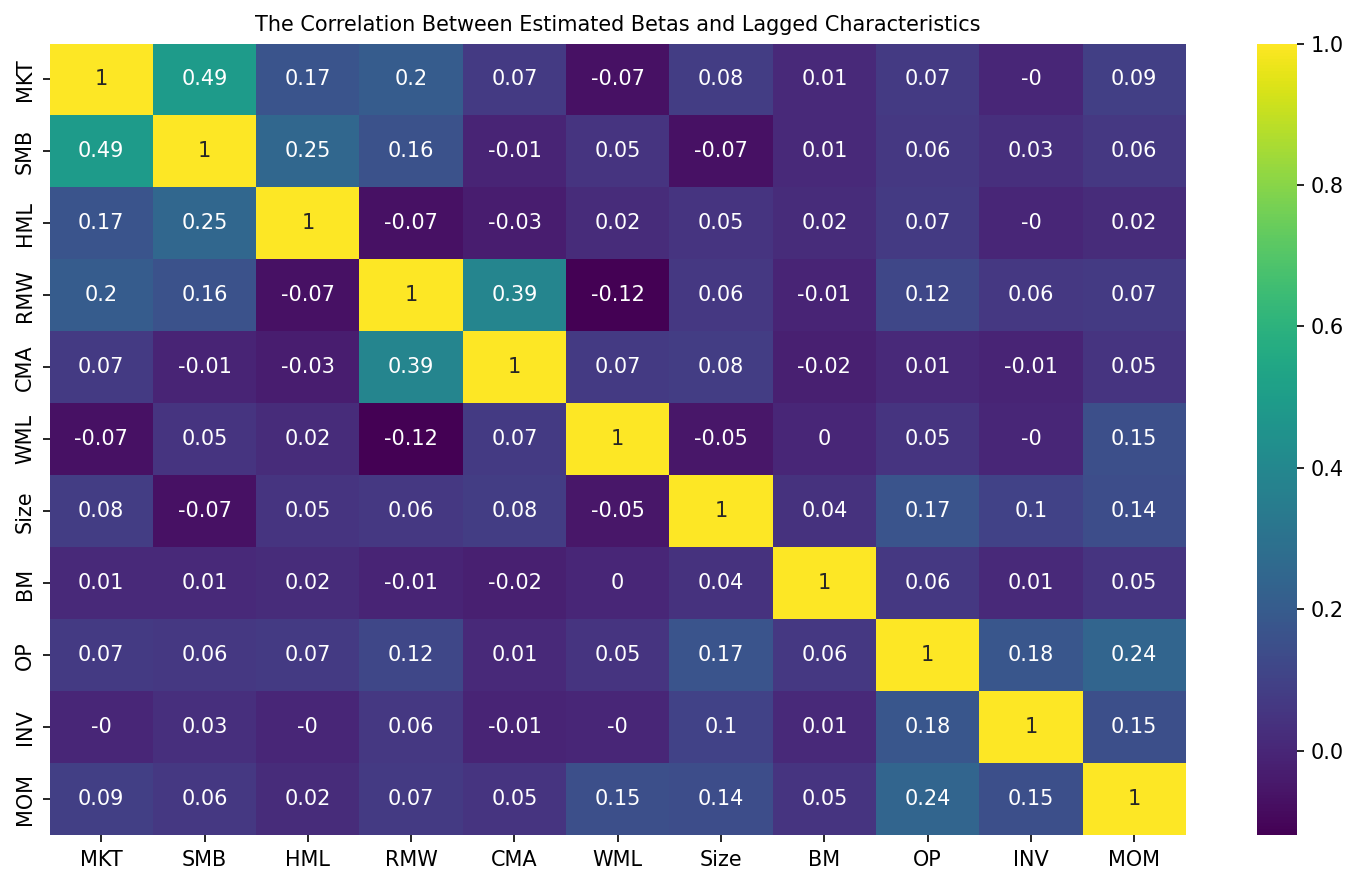

In [34]:
plt.figure(figsize=(10, 6), dpi=150, tight_layout=True)
sn.heatmap(round(df_ave_corr,2), annot=True, cmap="viridis")
plt.title('The Correlation Between Estimated Betas and Lagged Characteristics', fontsize=10)
plt.show()

In [35]:
IC_Series_tmp = IC_Series.T.set_index([pd.Index(pd.Series(range(0,len(IC_Series.T))))])
IC_Series_tmp = pd.concat([IC_Series_tmp, pd.DataFrame(k_index)], axis = 1)
IC_Series_tmp.columns = ['MKT','SMB','HML','RMW','CMA',"WML",'Size',"BM",'PE','OP','INV',"MOM",'Dates']
IC_Series_tmp = IC_Series_tmp.set_index('Dates')
IC_Series_tmp

,MKT,SMB,HML,RMW,CMA,WML,Size,BM,PE,OP,INV,MOM
Dates,,,,,,,,,,,,
2004-10-28,-0.413161,-0.129777,0.092934,-0.127394,0.111447,-0.238842,-0.312895,0.045825,0.041059,0.347906,-0.100999,0.419027
2004-10-29,0.012468,0.014668,0.067840,-0.044004,-0.175651,-0.165017,0.405574,-0.004767,-0.270260,-0.042171,-0.243491,0.328566
2004-11-01,-0.346359,-0.418456,-0.207852,-0.011191,0.354064,-0.105302,-0.264172,0.010457,0.246377,0.087874,-0.337553,-0.224546
2004-11-02,0.024399,0.108421,0.120528,-0.018712,-0.238855,-0.106219,0.188039,0.166942,-0.064025,0.044029,0.019446,0.270409
2004-11-03,0.075021,0.167878,0.194908,-0.214031,-0.046520,-0.017468,0.060495,0.113819,-0.085502,0.232786,0.234257,0.175233
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-19,0.123592,0.362833,0.119053,-0.471756,-0.300267,-0.027312,-0.416484,-0.070427,0.046600,-0.308534,-0.278548,0.016452
2018-12-20,0.177700,0.023742,0.230208,0.009805,0.357426,0.326473,0.066526,-0.178024,-0.070902,0.103476,0.235556,0.049186
2018-12-21,0.251276,0.206223,0.267806,0.248845,0.031035,0.115469,0.170570,0.017097,-0.038490,-0.005105,-0.083381,-0.028118


In [36]:
IC_Series = IC_Series_tmp
IC_Series

,MKT,SMB,HML,RMW,CMA,WML,Size,BM,PE,OP,INV,MOM
Dates,,,,,,,,,,,,
2004-10-28,-0.413161,-0.129777,0.092934,-0.127394,0.111447,-0.238842,-0.312895,0.045825,0.041059,0.347906,-0.100999,0.419027
2004-10-29,0.012468,0.014668,0.067840,-0.044004,-0.175651,-0.165017,0.405574,-0.004767,-0.270260,-0.042171,-0.243491,0.328566
2004-11-01,-0.346359,-0.418456,-0.207852,-0.011191,0.354064,-0.105302,-0.264172,0.010457,0.246377,0.087874,-0.337553,-0.224546
2004-11-02,0.024399,0.108421,0.120528,-0.018712,-0.238855,-0.106219,0.188039,0.166942,-0.064025,0.044029,0.019446,0.270409
2004-11-03,0.075021,0.167878,0.194908,-0.214031,-0.046520,-0.017468,0.060495,0.113819,-0.085502,0.232786,0.234257,0.175233
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-19,0.123592,0.362833,0.119053,-0.471756,-0.300267,-0.027312,-0.416484,-0.070427,0.046600,-0.308534,-0.278548,0.016452
2018-12-20,0.177700,0.023742,0.230208,0.009805,0.357426,0.326473,0.066526,-0.178024,-0.070902,0.103476,0.235556,0.049186
2018-12-21,0.251276,0.206223,0.267806,0.248845,0.031035,0.115469,0.170570,0.017097,-0.038490,-0.005105,-0.083381,-0.028118


In [37]:
# Annualized the mean of IC_Series
all_ICs = IC_Series.apply(lambda x: x.mean()*np.sqrt(252), axis = 0) 
all_ICs

MKT     0.086064
SMB     0.079716
HML     0.035704
RMW     0.166590
CMA     0.089927
WML     0.048837
Size    0.070805
BM      0.085794
PE     -0.078194
OP      0.158153
INV     0.057483
MOM     0.207792
dtype: float64

In [38]:
# Annualized ICIR
all_ICIRs = IC_Series.apply(lambda x: x.mean()/x.std()*np.sqrt(252), axis = 0) 
all_ICIRs

MKT     0.463345
SMB     0.428246
HML     0.195422
RMW     0.899879
CMA     0.477694
WML     0.265135
Size    0.306646
BM      0.486482
PE     -0.423264
OP      0.794572
INV     0.320360
MOM     0.931152
dtype: float64

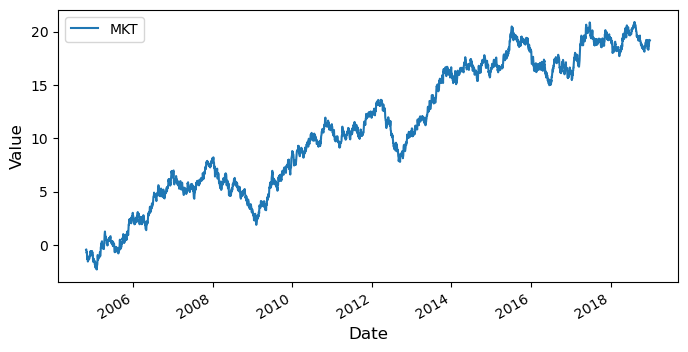

,IC,ICIR
MKT,0.086064,0.463345


In [39]:
## Plot Cumsum IC_Series of MKT
ax = IC_Series[['MKT']].cumsum().plot(figsize = (8,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[["MKT"]],all_ICIRs[["MKT"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

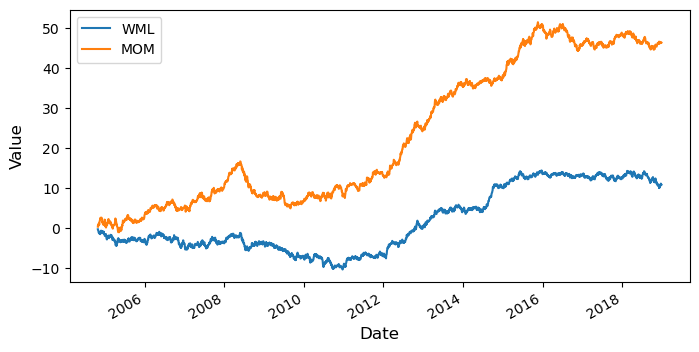

,IC,ICIR
WML,0.048837,0.265135
MOM,0.207792,0.931152


In [40]:
## Plot Cumsum IC_Series of WML
ax = IC_Series[['WML',"MOM"]].cumsum().plot(figsize = (8,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[["WML","MOM"]],all_ICIRs[["WML","MOM"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

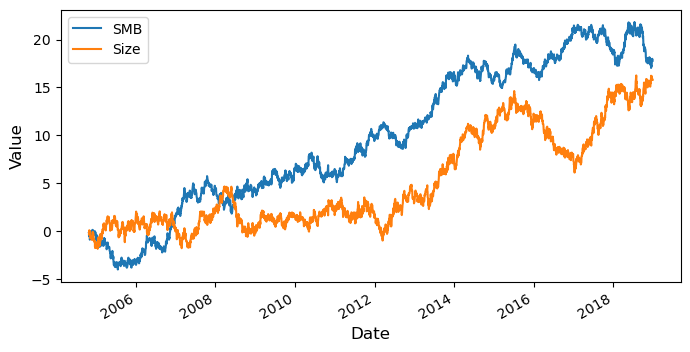

,IC,ICIR
SMB,0.079716,0.428246
Size,0.070805,0.306646


In [41]:
## Plot Cumsum IC_Series of SMB & Size
ax = IC_Series[["SMB","Size"]].cumsum().plot(figsize = (8,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[["SMB","Size"]],all_ICIRs[["SMB","Size"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

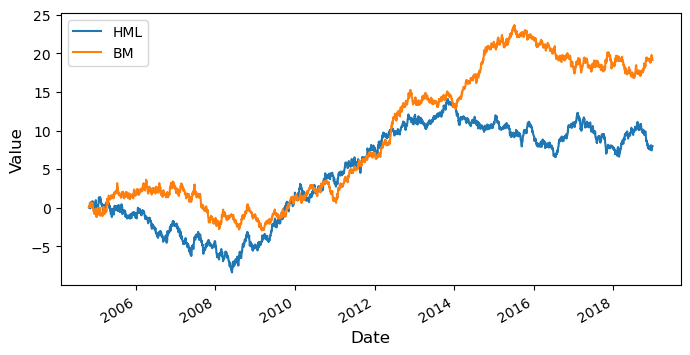

,IC,ICIR
HML,0.035704,0.195422
BM,0.085794,0.486482


In [42]:
## Plot Cumsum IC_Series of HML & BM
ax = IC_Series[["HML","BM"]].cumsum().plot(figsize = (8,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[["HML","BM"]],all_ICIRs[["HML","BM"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

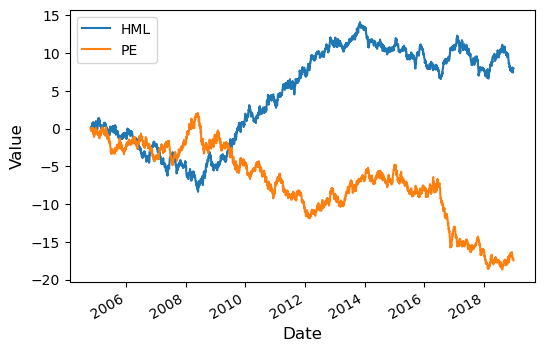

,IC,ICIR
HML,0.035704,0.195422
PE,-0.078194,-0.423264


In [43]:
## Plot Cumsum IC_Series of HML & PE
ax = IC_Series[["HML","PE"]].cumsum().plot(figsize = (6,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[["HML","PE"]],all_ICIRs[["HML","PE"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

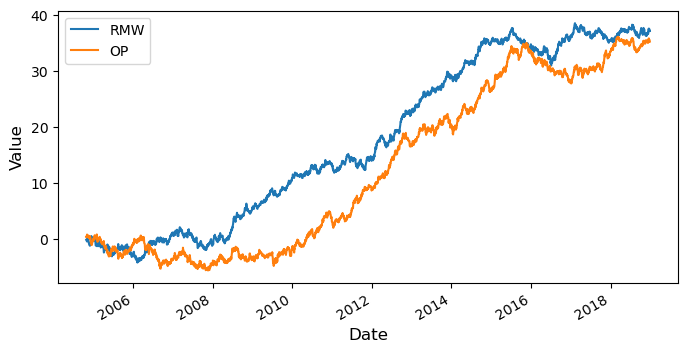

,IC,ICIR
RMW,0.166590,0.899879
OP,0.158153,0.794572


In [44]:
## Plot Cumsum IC_Series of RMW & OP
ax = IC_Series[["RMW","OP"]].cumsum().plot(figsize = (8,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[["RMW","OP"]],all_ICIRs[["RMW","OP"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

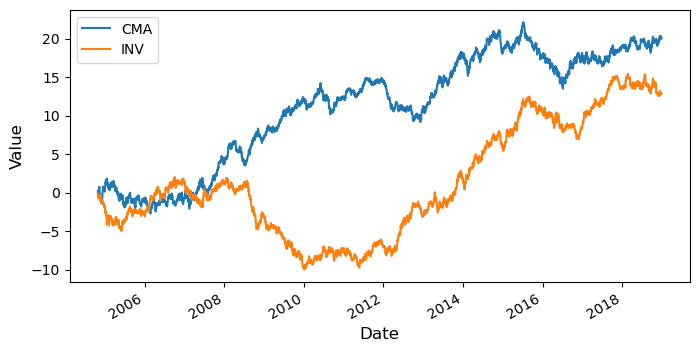

,IC,ICIR
CMA,0.089927,0.477694
INV,0.057483,0.320360


In [45]:
## Plot Cumsum IC_Series of CMA & INV
ax = IC_Series[["CMA","INV"]].cumsum().plot(figsize = (8,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[["CMA","INV"]],all_ICIRs[["CMA","INV"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

In [46]:
pd.concat([all_ICs[["MKT"]],all_ICIRs[["MKT"]]],axis=1).rename(columns={0:'IC',1:'ICIR'}).\
append(pd.concat([all_ICs[["SMB","Size"]],all_ICIRs[["SMB","Size"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})).\
append(pd.concat([all_ICs[["HML","BM"]],all_ICIRs[["HML","BM"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})).\
append(pd.concat([all_ICs[["WML","MOM"]],all_ICIRs[["WML","MOM"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})).\
append(pd.concat([all_ICs[["RMW","OP"]],all_ICIRs[["RMW","OP"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})).\
append(pd.concat([all_ICs[["CMA","INV"]],all_ICIRs[["CMA","INV"]]],axis=1).rename(columns={0:'IC',1:'ICIR'}))


<ipython-input-46-e463d04a53fa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd.concat([all_ICs[["MKT"]],all_ICIRs[["MKT"]]],axis=1).rename(columns={0:'IC',1:'ICIR'}).\
<ipython-input-46-e463d04a53fa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd.concat([all_ICs[["MKT"]],all_ICIRs[["MKT"]]],axis=1).rename(columns={0:'IC',1:'ICIR'}).\
<ipython-input-46-e463d04a53fa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd.concat([all_ICs[["MKT"]],all_ICIRs[["MKT"]]],axis=1).rename(columns={0:'IC',1:'ICIR'}).\
<ipython-input-46-e463d04a53fa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd.concat([all_ICs[["MKT"]],all_ICIRs[["MKT"

,IC,ICIR
MKT,0.086064,0.463345
SMB,0.079716,0.428246
Size,0.070805,0.306646
HML,0.035704,0.195422
BM,0.085794,0.486482
WML,0.048837,0.265135
MOM,0.207792,0.931152
RMW,0.166590,0.899879
OP,0.158153,0.794572
CMA,0.089927,0.477694


In [47]:
# Keep the size and EP have the same length as stock returns
df_FF6 = pd.concat([df_FF5, df_FF4["WML"]], axis=1)
df_FF6_trnct = df_FF6.loc[IC_Series.index,:]
df_Ex_SR_trnct = df_Ex_SR.loc[IC_Series.index,:].dropna(axis=1)
df_ln_Size_trnct = df_ln_Size.loc[df_Ex_SR_trnct.index,:]
df_PE_trnct = df_PE.loc[df_Ex_SR_trnct.index,:]
df_OP_trnct = df_OP.loc[df_Ex_SR_trnct.index,:]
df_INV_trnct = df_INV.loc[df_Ex_SR_trnct.index,:]
df_BM_trnct = df_BM.loc[df_Ex_SR_trnct.index,:]
df_MOM_trnct = df_mom.loc[df_Ex_SR_trnct.index,:]

In [48]:
betas = []
for j in df_Ex_SR_trnct.columns:
    ols = sm.OLS(df_Ex_SR_trnct.loc[:,j].values, df_FF6_trnct.values)
    res = ols.fit()
    b = list(res.params)
    b.append(j)
    betas.append(b)
df_betas = pd.DataFrame(betas).rename(columns={0:'MKT',1:'SMB',2:'HML',3:'RMW',4:'CMA',5:"WML",6:'stock'}).set_index('stock')


In [49]:
df_betas

,MKT,SMB,HML,RMW,CMA,WML
stock,,,,,,
MTN.SJ.Equity,0.946556,-0.331072,-0.001759,0.203985,0.060914,0.068931
AEG.SJ.Equity,0.691449,-0.254177,0.140016,-0.285105,0.002726,-0.218690
NTC.SJ.Equity,0.484339,-0.413950,-0.046218,0.101604,0.038950,0.093699
WHL.SJ.Equity,0.537553,-0.574269,-0.092894,0.265498,0.095892,0.318106
SOL.SJ.Equity,1.183829,0.000126,-0.007578,-0.099088,0.032077,-0.171313
...,...,...,...,...,...,...
HDC.SJ.Equity,0.319564,0.125650,0.066563,0.120160,0.021222,-0.004826
BEL.SJ.Equity,0.303157,0.329072,0.030264,-0.138725,0.075712,0.180264
CSB.SJ.Equity,0.261150,-0.022929,0.130004,0.129656,-0.027324,0.216360


In [50]:
IC_Series = pd.DataFrame()
k_index = []

df_Ex_SR_tmp_T = df_Ex_SR_trnct.T
df_ln_Size_tmp_T = df_ln_Size_trnct.T
df_BM_tmp_T = df_BM_trnct.T
df_PE_tmp_T = df_PE_trnct.T
df_OP_tmp_T = df_OP_trnct.T
df_INV_tmp_T = df_INV_trnct.T
df_MOM_tmp_T = df_MOM_trnct.T

index_times = list(df_Ex_SR_tmp_T.columns)
 
df_TS_CS = pd.DataFrame()
for k in tqdm(df_Ex_SR_tmp_T.columns[:-Gap]):
    IC = []

    index_tmp = df_betas.index.intersection(df_ln_Size_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_BM_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_PE_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_Ex_SR_tmp_T.loc[:,index_times[index_times.index(k)+Gap]].dropna().index).\
                    intersection(df_OP_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_INV_tmp_T.loc[:,k].dropna().index).\
                    intersection(df_MOM_tmp_T.loc[:,k].dropna().index)

    df_TS_CS = pd.concat([df_betas.loc[index_tmp,:].astype(np.float64), \
                                         df_ln_Size_tmp_T.loc[index_tmp,k],df_BM_tmp_T.loc[index_tmp,k],\
                                         df_PE_tmp_T.loc[index_tmp,k], df_OP_tmp_T.loc[index_tmp,k],\
                                         df_INV_tmp_T.loc[index_tmp,k], df_MOM_tmp_T.loc[index_tmp,k]],axis = 1)

    if len(index_tmp) > 10:
        for j in range(len(df_TS_CS.columns)):
            ic = list(spearmanr(df_TS_CS.iloc[:,j].values,df_Ex_SR_tmp_T.loc[index_tmp,index_times[index_times.index(k)]]))[0]
            IC.append(ic)
        k_index.append(k)
    IC_Series = pd.concat([IC_Series, pd.DataFrame(IC)],axis=1)
    

100%|██████████| 3520/3520 [01:05<00:00, 53.76it/s]


In [51]:
df_TS_CS

,MKT,SMB,HML,RMW,CMA,WML,2018-11-23 00:00:00,2018-11-23 00:00:00,2018-11-23 00:00:00,2018-11-23 00:00:00,2018-11-23 00:00:00,2018-11-23 00:00:00
MTN.SJ.Equity,0.946556,-0.331072,-0.001759,0.203985,0.060914,0.068931,2.047639,-112.955857,0.347900,0.089392,-0.102128,-0.478152
NTC.SJ.Equity,0.484339,-0.413950,-0.046218,0.101604,0.038950,0.093699,1.159888,1.257890,0.318784,0.314513,-0.089258,0.014788
WHL.SJ.Equity,0.537553,-0.574269,-0.092894,0.265498,0.095892,0.318106,1.387977,1.029771,-0.157790,-0.791568,-0.156979,-0.235036
SOL.SJ.Equity,1.183829,0.000126,-0.007578,-0.099088,0.032077,-0.171313,2.287994,-3.113528,-0.170683,-0.093913,0.023271,0.097905
RMH.SJ.Equity,0.876346,-0.483033,0.157453,0.187088,0.011087,0.150093,1.749337,4.116643,-0.361215,-0.153050,0.061301,0.012130
SAP.SJ.Equity,0.841804,-0.065366,-0.090832,-0.155842,0.028811,-0.166479,0.017516,-6.646572,-0.242973,-0.015649,-0.075903,-0.248540
IMP.SJ.Equity,1.345602,-0.344447,-0.391297,-0.305146,0.278478,-0.596359,0.749490,-1.842817,10.725596,-1.173899,-0.359084,-0.318490
NPK.SJ.Equity,0.389613,-0.454414,-0.029836,-0.027060,0.012841,-0.023636,0.555972,-2.550125,-0.231404,-0.033566,0.084275,-0.127337
GFI.SJ.Equity,0.753718,-0.090847,-0.703297,-0.585202,0.375451,-0.941331,-0.052909,-2.389722,-0.204161,0.137690,-0.361451,-0.232318
ACL.SJ.Equity,0.948468,-0.368733,0.034461,-0.295608,0.185329,-0.378395,-0.171140,-1.912305,1.165672,0.070923,-0.196430,-0.185020


In [52]:
spearmanr(df_TS_CS.iloc[:,j].values,df_Ex_SR_tmp_T.loc[index_tmp,index_times[index_times.index(k)+Gap]])

SpearmanrResult(correlation=0.004780811927720606, pvalue=0.9760285229315551)

In [53]:
IC_Series_tmp = IC_Series.T.set_index([pd.Index(pd.Series(range(0,len(IC_Series.T))))])
IC_Series_tmp = pd.concat([IC_Series_tmp, pd.DataFrame(k_index)], axis = 1)
IC_Series_tmp.columns = ['MKT','SMB','HML','RMW','CMA',"WML",'Size',"BM",'PE','OP','INV',"MOM",'Dates']
IC_Series_tmp = IC_Series_tmp.set_index('Dates')
IC_Series_tmp

,MKT,SMB,HML,RMW,CMA,WML,Size,BM,PE,OP,INV,MOM
Dates,,,,,,,,,,,,
2004-10-28,-0.314883,-0.303152,-0.026760,0.505132,-0.141496,0.388196,0.027859,-0.004765,-0.412757,-0.087977,-0.315249,0.103006
2004-10-29,-0.356436,-0.381005,-0.380638,0.535387,-0.057572,0.581225,-0.309498,0.069307,0.100477,0.133847,-0.157316,0.444078
2004-11-01,0.353960,-0.194908,0.274158,-0.170085,-0.070056,-0.132942,0.415926,0.028868,-0.200976,-0.049830,-0.136987,-0.171004
2004-11-02,0.056082,-0.157213,0.289236,0.201527,-0.091754,0.124483,-0.023168,-0.158684,-0.378967,-0.239773,0.083295,0.281329
2004-11-03,-0.163183,-0.113678,0.069307,0.323066,0.026036,0.278695,-0.089476,-0.279428,-0.033737,-0.061606,0.221856,0.270994
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-19,0.441374,-0.033304,-0.392270,-0.165222,0.389028,-0.168625,0.077871,0.180131,0.365367,-0.003160,-0.338303,0.045134
2018-11-20,-0.153721,0.163040,0.196264,-0.120254,-0.266683,-0.035412,-0.244236,-0.230866,-0.183866,-0.141891,-0.029172,-0.327053
2018-11-21,0.172676,-0.186938,-0.135889,0.140750,0.189693,0.109635,0.116441,0.140588,0.199255,0.102504,-0.114821,0.038003


In [54]:
IC_Series = IC_Series_tmp
IC_Series

,MKT,SMB,HML,RMW,CMA,WML,Size,BM,PE,OP,INV,MOM
Dates,,,,,,,,,,,,
2004-10-28,-0.314883,-0.303152,-0.026760,0.505132,-0.141496,0.388196,0.027859,-0.004765,-0.412757,-0.087977,-0.315249,0.103006
2004-10-29,-0.356436,-0.381005,-0.380638,0.535387,-0.057572,0.581225,-0.309498,0.069307,0.100477,0.133847,-0.157316,0.444078
2004-11-01,0.353960,-0.194908,0.274158,-0.170085,-0.070056,-0.132942,0.415926,0.028868,-0.200976,-0.049830,-0.136987,-0.171004
2004-11-02,0.056082,-0.157213,0.289236,0.201527,-0.091754,0.124483,-0.023168,-0.158684,-0.378967,-0.239773,0.083295,0.281329
2004-11-03,-0.163183,-0.113678,0.069307,0.323066,0.026036,0.278695,-0.089476,-0.279428,-0.033737,-0.061606,0.221856,0.270994
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-19,0.441374,-0.033304,-0.392270,-0.165222,0.389028,-0.168625,0.077871,0.180131,0.365367,-0.003160,-0.338303,0.045134
2018-11-20,-0.153721,0.163040,0.196264,-0.120254,-0.266683,-0.035412,-0.244236,-0.230866,-0.183866,-0.141891,-0.029172,-0.327053
2018-11-21,0.172676,-0.186938,-0.135889,0.140750,0.189693,0.109635,0.116441,0.140588,0.199255,0.102504,-0.114821,0.038003


In [55]:
# Annualized the mean of IC_Series
all_ICs = IC_Series.apply(lambda x: x.mean()*np.sqrt(252), axis = 0) 
all_ICs

MKT    -0.095741
SMB    -0.095126
HML     0.116481
RMW     0.268809
CMA    -0.199952
WML     0.368239
Size    0.041929
BM      0.178530
PE      0.224753
OP      0.153694
INV     0.024435
MOM     0.180710
dtype: float64

In [56]:
# Annualized ICIR
all_ICIRs = IC_Series.apply(lambda x: x.mean()/x.std()*np.sqrt(252), axis = 0) 
all_ICIRs

MKT    -0.390074
SMB    -0.395656
HML     0.540153
RMW     0.995177
CMA    -0.892853
WML     1.342379
Size    0.175811
BM      0.991796
PE      1.192712
OP      0.752579
INV     0.132443
MOM     0.787076
dtype: float64

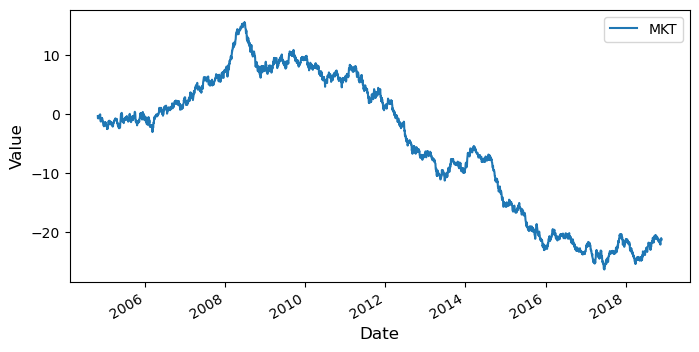

,IC,ICIR
MKT,-0.095741,-0.390074


In [57]:
## Plot Cumsum IC_Series of MKT
ax = IC_Series[['MKT']].cumsum().plot(figsize = (8,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[["MKT"]],all_ICIRs[["MKT"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

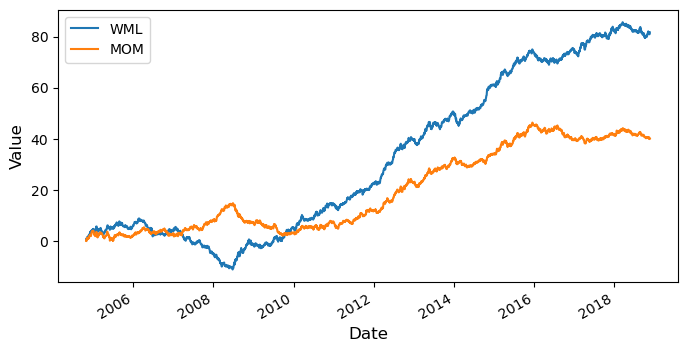

,IC,ICIR
WML,0.368239,1.342379
MOM,0.180710,0.787076


In [58]:
## Plot Cumsum IC_Series of WML
ax = IC_Series[['WML',"MOM"]].cumsum().plot(figsize = (8,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[['WML',"MOM"]],all_ICIRs[['WML',"MOM"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

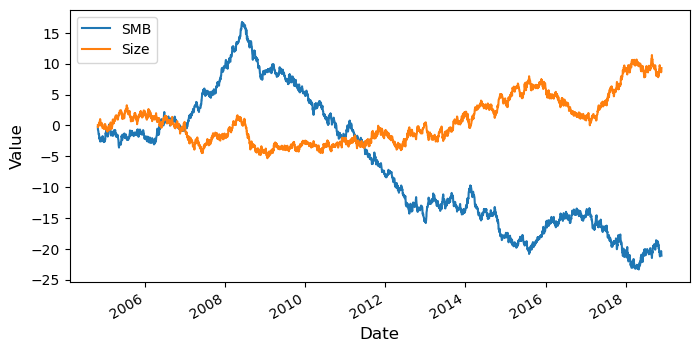

,IC,ICIR
SMB,-0.095126,-0.395656
Size,0.041929,0.175811


In [59]:
## Plot Cumsum IC_Series of SMB & Size
# ax = IC_Series[["SMB","Size"]].cumsum().plot(title = 'Cumulative Sum of SMB & Size IC_Series',figsize = (8,4))
ax = IC_Series[["SMB","Size"]].cumsum().plot(figsize = (8,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[["SMB","Size"]],all_ICIRs[["SMB","Size"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

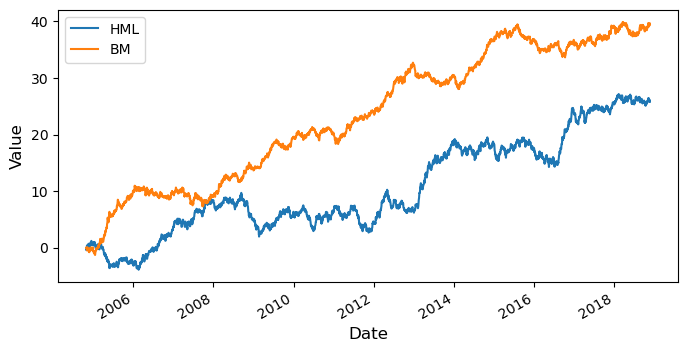

,IC,ICIR
HML,0.116481,0.540153
BM,0.178530,0.991796


In [60]:
## Plot Cumsum IC_Series of HML & BM
ax = IC_Series[["HML","BM"]].cumsum().plot(figsize = (8,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[["HML","BM"]],all_ICIRs[["HML","BM"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

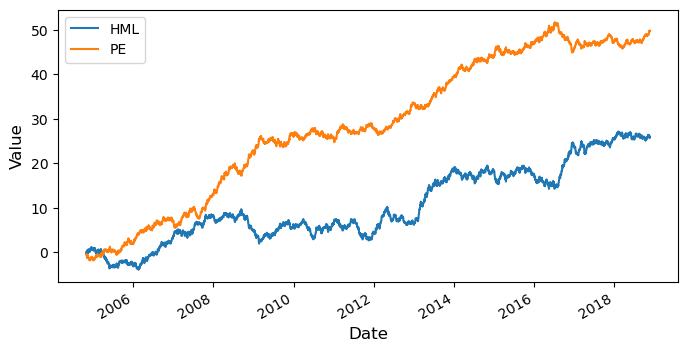

,IC,ICIR
HML,0.116481,0.540153
PE,0.224753,1.192712


In [61]:
## Plot Cumsum IC_Series of HML & PE
ax = IC_Series[["HML","PE"]].cumsum().plot(figsize = (8,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[["HML","PE"]],all_ICIRs[["HML","PE"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

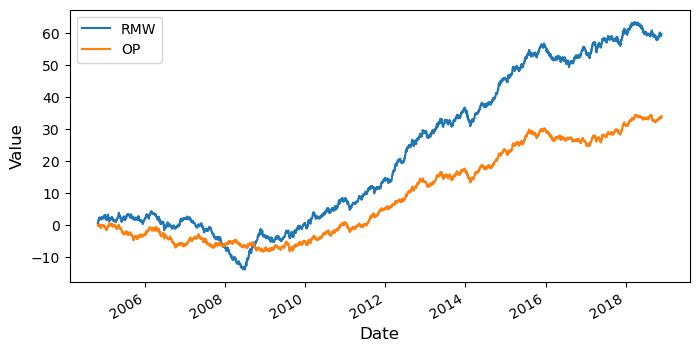

,IC,ICIR
RMW,0.268809,0.995177
OP,0.153694,0.752579


In [62]:
## Plot Cumsum IC_Series of RMW & OP
ax = IC_Series[["RMW","OP"]].cumsum().plot(figsize = (8,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[["RMW","OP"]],all_ICIRs[["RMW","OP"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

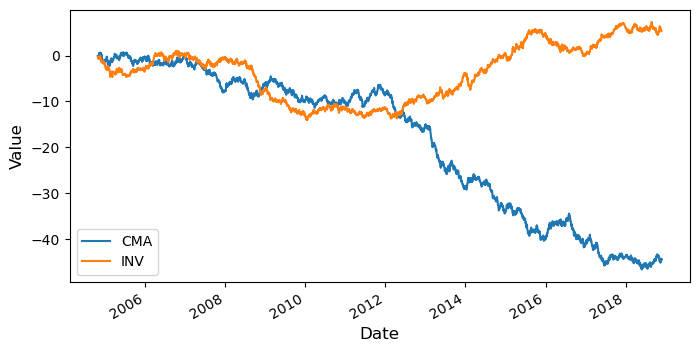

,IC,ICIR
CMA,-0.199952,-0.892853
INV,0.024435,0.132443


In [63]:
## Plot Cumsum IC_Series of CMA & INV
ax = IC_Series[["CMA","INV"]].cumsum().plot(figsize = (8,4))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()
pd.concat([all_ICs[["CMA","INV"]],all_ICIRs[["CMA","INV"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})

In [64]:
pd.concat([all_ICs[["MKT"]],all_ICIRs[["MKT"]]],axis=1).rename(columns={0:'IC',1:'ICIR'}).\
append(pd.concat([all_ICs[["SMB","Size"]],all_ICIRs[["SMB","Size"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})).\
append(pd.concat([all_ICs[["HML","BM"]],all_ICIRs[["HML","BM"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})).\
append(pd.concat([all_ICs[["WML","MOM"]],all_ICIRs[["WML","MOM"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})).\
append(pd.concat([all_ICs[["RMW","OP"]],all_ICIRs[["RMW","OP"]]],axis=1).rename(columns={0:'IC',1:'ICIR'})).\
append(pd.concat([all_ICs[["CMA","INV"]],all_ICIRs[["CMA","INV"]]],axis=1).rename(columns={0:'IC',1:'ICIR'}))


<ipython-input-64-e463d04a53fa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd.concat([all_ICs[["MKT"]],all_ICIRs[["MKT"]]],axis=1).rename(columns={0:'IC',1:'ICIR'}).\
<ipython-input-64-e463d04a53fa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd.concat([all_ICs[["MKT"]],all_ICIRs[["MKT"]]],axis=1).rename(columns={0:'IC',1:'ICIR'}).\
<ipython-input-64-e463d04a53fa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd.concat([all_ICs[["MKT"]],all_ICIRs[["MKT"]]],axis=1).rename(columns={0:'IC',1:'ICIR'}).\
<ipython-input-64-e463d04a53fa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd.concat([all_ICs[["MKT"]],all_ICIRs[["MKT"

,IC,ICIR
MKT,-0.095741,-0.390074
SMB,-0.095126,-0.395656
Size,0.041929,0.175811
HML,0.116481,0.540153
BM,0.178530,0.991796
WML,0.368239,1.342379
MOM,0.180710,0.787076
RMW,0.268809,0.995177
OP,0.153694,0.752579
CMA,-0.199952,-0.892853


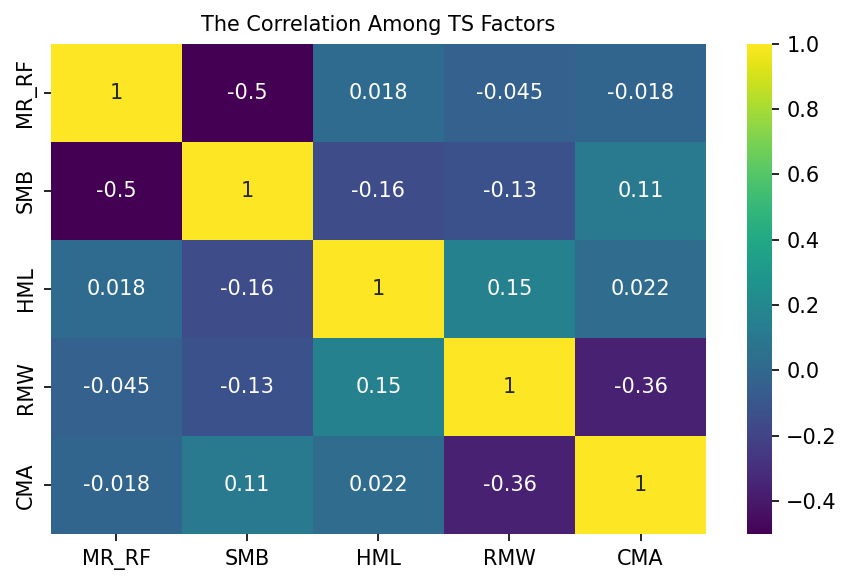

In [65]:
plt.figure(figsize=(6, 4), dpi=150, tight_layout=True)
corrMatrix = df_FF5.corr()
sn.heatmap(corrMatrix, annot=True, cmap="viridis")
plt.title('The Correlation Among TS Factors', fontsize=10)
plt.show()